In [1]:
#imports

import SimDAT2D.SimDAT2D as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D as iso # import IsoDat2D as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
import masking
import cupy
import nimfa

In [2]:
#masking algoirthm to create masks for the data


def make_masks(array, slices, offset=5, width=0.5, gits=False):
    """
    Generate masks for given array and slices.

    Parameters:
    array (numpy.ndarray): The input array for which masks are to be generated.
    slices (list of int): A list of slice indices to generate masks for.
    offset (int, optional): The offset value to be used in mask generation. Default is 5.
    width (float, optional): The width parameter to be used in mask generation. Default is 0.5.
    gits (bool, optional): If True, additional masks will be generated and displayed. Default is False.

    Returns:
    list of numpy.ndarray: A list of generated masks. If gits is True, returns a list of combined masks.
    """
    masks = []
    mask_2048 = np.zeros((2048, 2048), dtype=bool)
    mask_2048[1024:] = True
    for i in slices:
        masks.append(masking.generate_mask_slices(array, width, i, offset = offset))
        print('Mask with {} slices created'.format(i))
        if gits == True:
            gits_masks = []
            for i in range(len(masks)):
                masks_p = masks[i] + mask_2048
                gits_masks.append(masks_p)
                plt.imshow(masks_p)
    return gits_masks

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
Ni


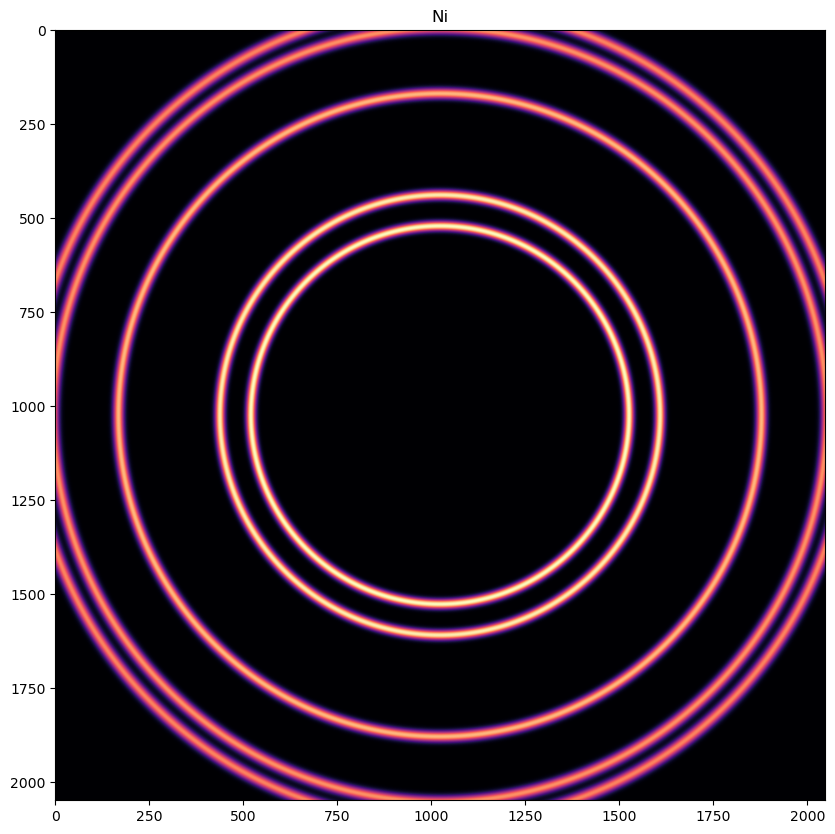

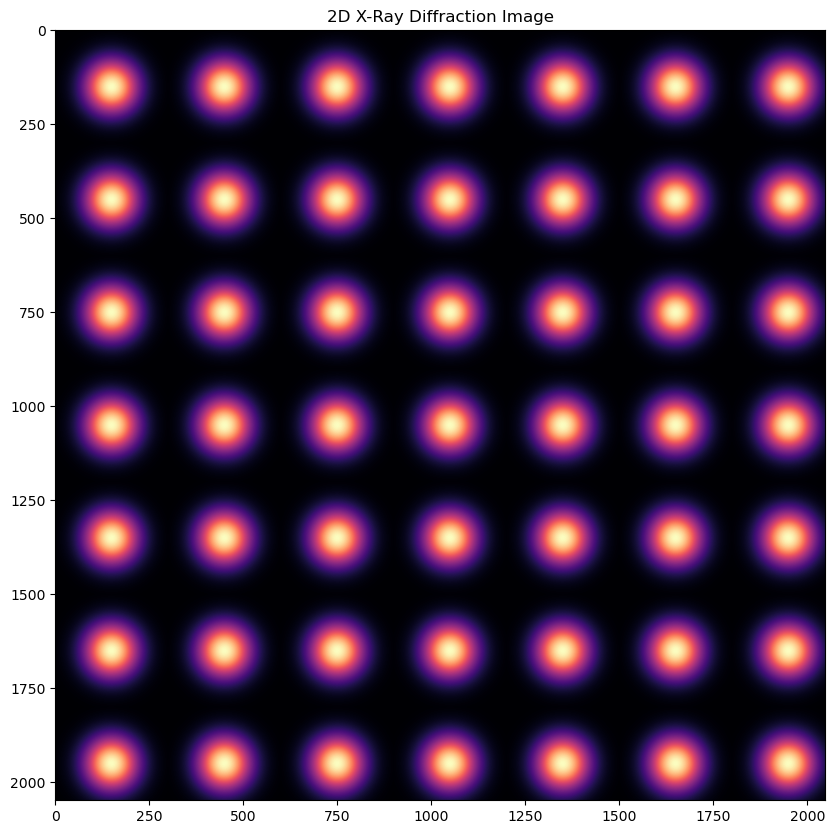

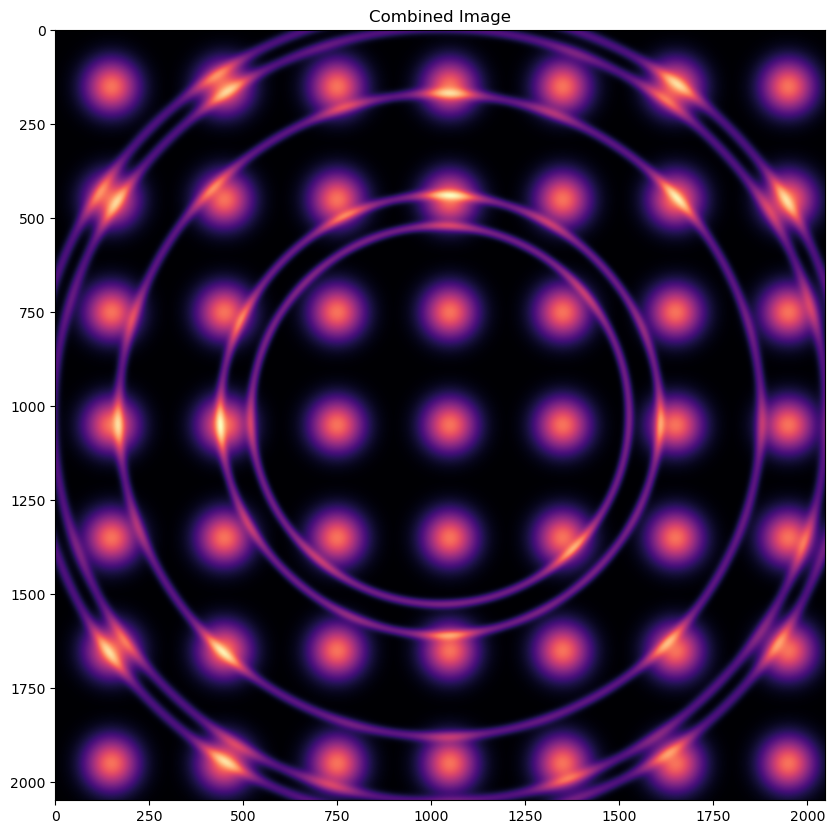

In [3]:
#creating synthetic data

#For ring creation
isotropic_signal = sim.create_isotropic(.4, .5e-10, cmap = 'magma')
#For spot creation
anisotropic_signal = sim.create_anisotropic(25, 50, 300, 300, cmap = 'magma')
#combining signals 
thin_film = sim.combine_image(isotropic_signal, anisotropic_signal*2, cmap= 'magma')

In [4]:
array, ai_pe = masking.make_chi_array(thin_film, .4, .5e-10)

[masked_array(
  data=[[-135.00017100451313, -134.97216689027152, -134.94413749056966,
         ..., -45.05619265132289, -45.02816084175853, -45.00015640746067],
        [-135.02817528583523, -135.0001711717571, -134.97214174542282,
         ..., -45.02818839694317, -45.00015656042945, -44.97215212598207],
        [-135.05620485260465, -135.02820076548636, -135.000171339316,
         ..., -45.00015880320792, -44.972126966543236,
         -44.94412255874272],
        ...,
        [135.0561923155709, 135.02818822843457, 135.00015880225814, ...,
         45.00017134026579, 44.97213950359518, 44.94413509577675],
        [135.0281606735792, 135.000156559494, 134.9721271331666, ...,
         45.028203009199196, 45.00017117269255, 44.972166738238265],
        [135.00015640652705, 134.97215229229232, 134.94412289261135, ...,
         45.05620724928089, 45.028175439737566, 45.00017100544677]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

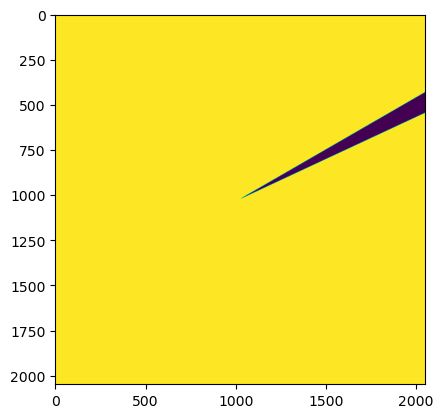

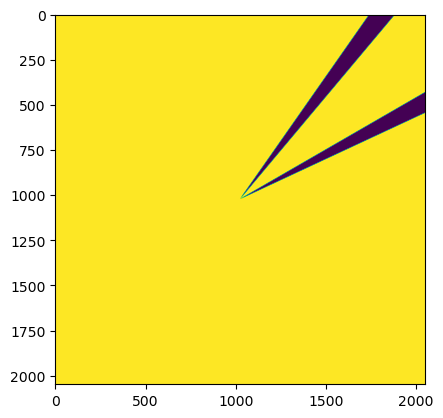

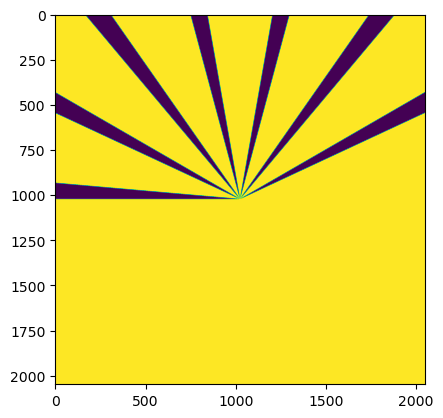

In [10]:
masks = make_masks(array, [1,2,11], offset = 20, width = 5, gits = True)
# masks_v2 = make_masks(array, [1,2], offset = 70, width = 3, gits = True)
mask_one = masks[0] 
mask_two = masks[1] 
mask_three = masks[2] 
# mask_four = masks_v2[0] 
# mask_five = masks_v2[1]

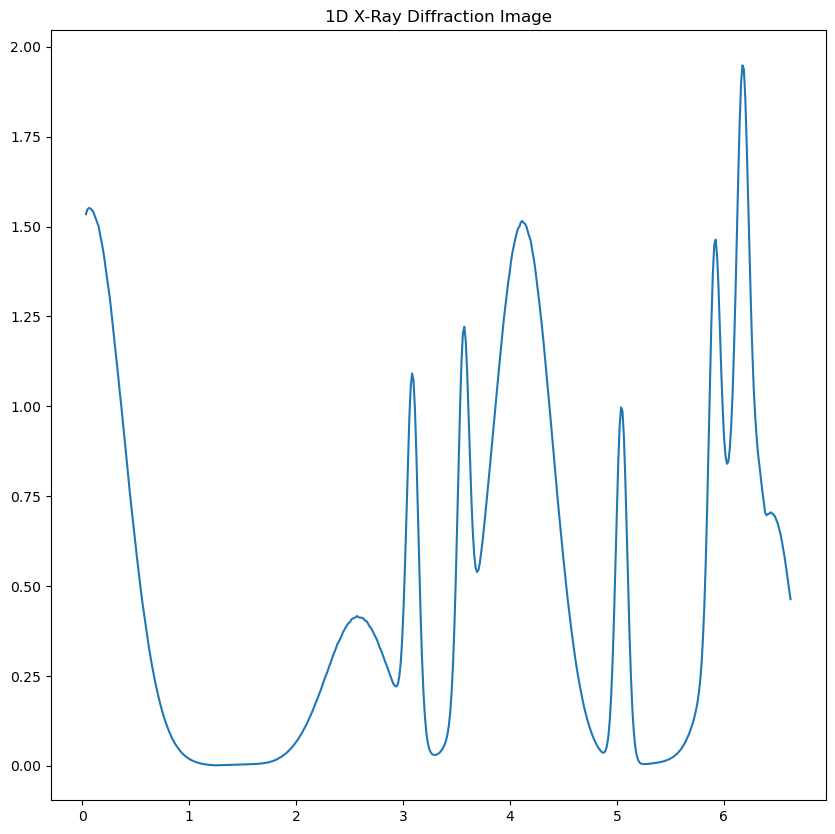

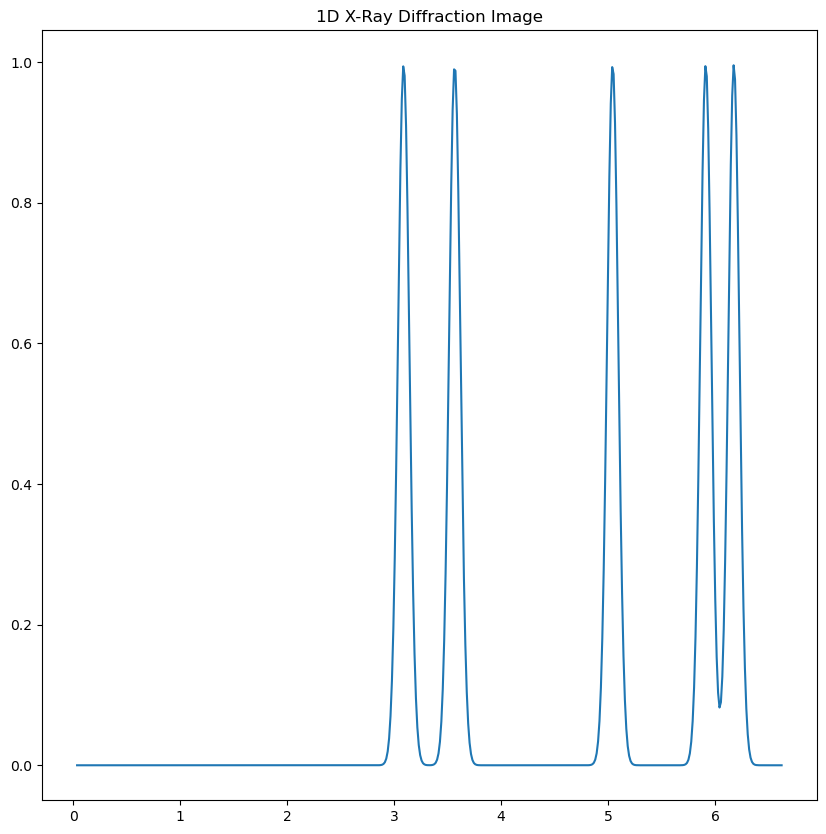

In [11]:
q, integrated_im = sim.integrate_image(thin_film, .4, .5e-10, resolution = 500, mask = mask_one, show = True)
q, integrated_im2 = sim.integrate_image(isotropic_signal, .4, .5e-10, resolution = 500, mask = mask_one, show = True)   

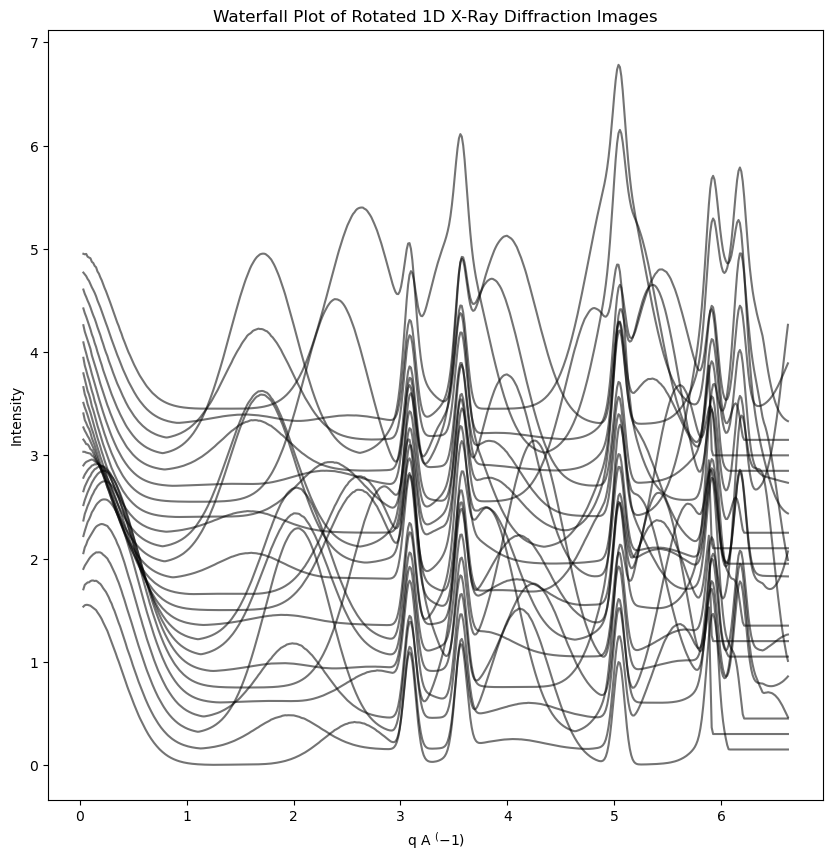

In [25]:
q, data = sim.rotate_and_integrate(thin_film, 15, .4, .5e-10, resolution = 500, mask = mask_one)

In [ ]:
column_mapping = {}
for i in range(7, 13):
    column_mapping[(i - 7)] = (i)
ints1.rename(columns=column_mapping, inplace=True) 
   
column_mapping = {}
for i in range(14, 20):
    column_mapping[(i - 14)] = (i)
print(column_mapping)
ints2.rename(columns=column_mapping, inplace=True) 

column_mapping = {}
for i in range(21, 27):
    column_mapping[(i - 21)] = (i)
print(column_mapping)
ints3.rename(columns=column_mapping, inplace=True)  
  

In [ ]:
data_m = pd.concat([ints, ints1, ints2, ints3, ints4], axis = 1)
data_m = data_m.clip(lower=0)
data_m = np.array(data_m) 

The beta-divergence is:  92.43407168166269 %
 The final number of components used were 24 



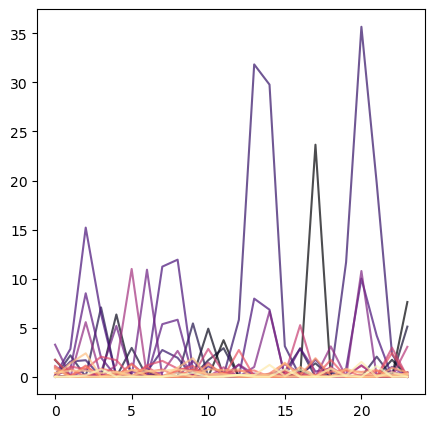

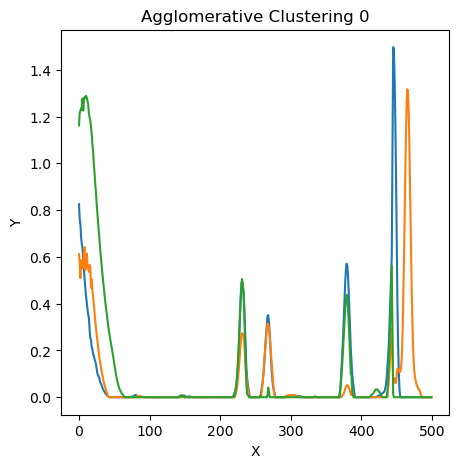

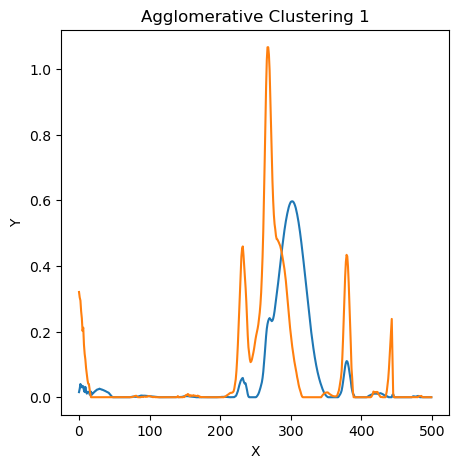

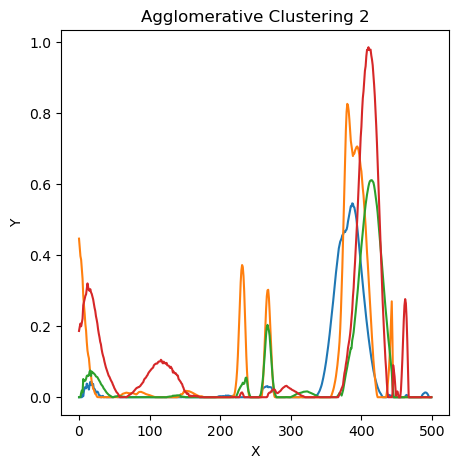

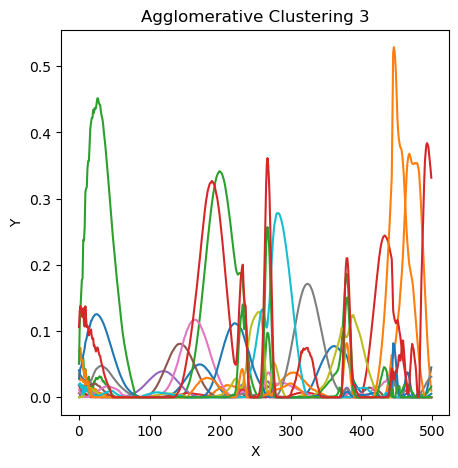

In [26]:
 dictionary = iso.run_nmfac(data, clusters = 4)

# cluster_groups2 = {}
# for cluster_num in set(my_dict['Cluster_Number']):
#     cluster_groups2[cluster_num] = []

# # Group the data based on cluster numbers
# for cluster_num, int_angle in zip(my_dict['Cluster_Number'], my_dict['Int_Angle']):
#     cluster_groups2[cluster_num].append(int_angle)
    
# np.save('example.npy', cluster_groups2)

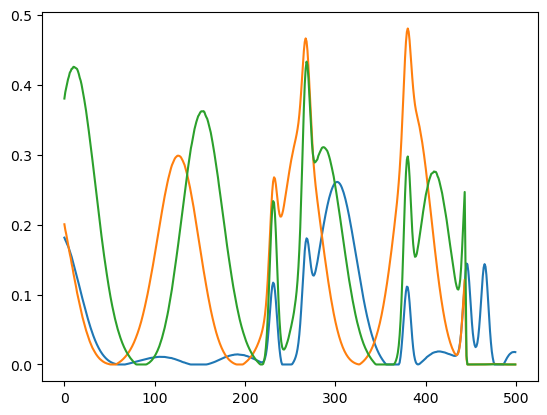

In [22]:
plt.plot(dictionary.T)